In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
titanic = pd.read_csv("D:\Titanic.csv")

In [3]:
# using titanic dataframe to make a list, where each list item is a dictionary, which represents a row, 
# with keys as columns heads, and values as items.
titanic_list = titanic.to_dict('records')

In [4]:
# number of people that survived the wreck
int(titanic.Survived.sum())

342

In [5]:
# Takes a string which is either an empty string or represents an integer/float,
# and returns an int/float or None.
def parse_float(i):
    if i == '':
        return None
    else:
        return float(i)
    
def parse_int(i):
    if i == '':
        return None
    else:
        return int(i)

In [6]:
#convert str type values in titanic_list to int/float type
for dic in titanic_list:
    dic['Parch'] = parse_int(dic['Parch'])
    dic['PassengerId'] = parse_int(dic['PassengerId'])
    dic['SibSp'] = parse_int(dic['SibSp'])
    dic['Survived'] = parse_int(dic['Survived'])
    dic['Pclass'] = parse_int(dic['Pclass'])

## Comparison of Survival of Males vs Females

In [7]:
# finding out number of males and females
print titanic.Sex.tolist().count('male')
print titanic.Sex.tolist().count('female')

577
314


(array([0, 1]), <a list of 2 Text xticklabel objects>)

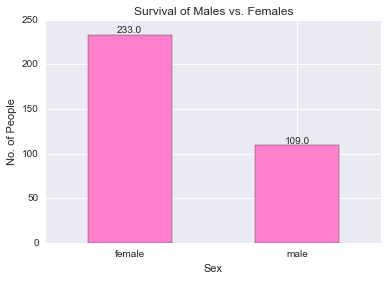

In [8]:
df = titanic.groupby('Sex').sum()
df_bar = df['Survived'].plot(kind = 'bar', color = (1, 0.5, 0.8), title = 'Survival of Males vs. Females')
plt.xlabel('Sex'); plt.ylabel('No. of People')
for p in df_bar.patches:
    height = p.get_height()
    df_bar.text(p.get_x()+p.get_width()/2, round(height, 1), 1*height, ha = 'center', va = 'bottom')
plt.xticks(rotation = 0)

In [9]:
df = df[df.columns.difference(['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Age'])]
df['Number of People'] = [titanic.Sex.tolist().count('female'), titanic.Sex.tolist().count('male')]
df['Proportion Survived'] = df['Survived']/df['Number of People']
df = pd.DataFrame(df.round(2))
df = df[['Number of People', 'Survived', 'Proportion Survived']]
df

,Number of People,Survived,Proportion Survived
Sex,,,
female,314,233,0.74
male,577,109,0.19


## Survival on basis of PClass

In [10]:
pclass_wise = titanic.groupby('Pclass').sum()
pclass_wise = pclass_wise[pclass_wise.columns.difference(['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare'])]
pclass_wise['Total'] = [titanic.Pclass.tolist().count(1), titanic.Pclass.tolist().count(2), titanic.Pclass.tolist().count(3)]
pclass_wise['Proportion Survived'] = pclass_wise['Survived']/pclass_wise['Total']
pclass_wise = pd.DataFrame(pclass_wise.round(2))
pclass_wise['Died'] = pclass_wise['Total'] - pclass_wise['Survived']
pclass_wise = pclass_wise[['Survived', 'Died', 'Total', 'Proportion Survived']]
pclass_wise

,Survived,Died,Total,Proportion Survived
Pclass,,,,
1,136,80,216,0.63
2,87,97,184,0.47
3,119,372,491,0.24


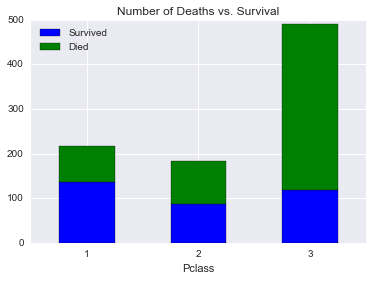

In [11]:
pclass_wise[['Survived', 'Died']].plot(kind = 'bar', stacked = True, legend = True)
plt.xticks(rotation = 0)
plt.title('Number of Deaths vs. Survival')

## Survival on basis of Age

In [12]:
# calculate the numbe of people whose ages are missing.
f = titanic.sort_values(by = 'Age', ascending = True)
f['Age'].isnull().sum()

177

In [13]:
# all_ages only contains the data for which age is not missing
all_ages = titanic[titanic['Age'].notnull()]
# make new dataframe ages_in_order which has ages arranged in order
ages_in_order = all_ages.sort_values(by = 'Age', ascending = True)

In [14]:
# convert dataframe to list with each list item (a dictionary) representing a row
ages_list = ages_in_order.to_dict('records')

In [15]:
ages_dic = {}

In [16]:
ages_dic['Age Range'] = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', \
                         '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80-85']

In [17]:
# make age ranges and distribute data accordingly in the range.
ages_dic['Survived'] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ages_dic['Number of People'] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for dic in ages_list:
    if dic['Age'] <= 5:
        ages_dic['Number of People'][0] += 1
        if dic['Survived'] == 1:
            ages_dic['Survived'][0] += 1
    elif dic['Age'] <= 10:
        ages_dic['Number of People'][1] += 1
        if dic['Survived'] == 1:
            ages_dic['Survived'][1] += 1
    elif dic['Age'] <= 15:
        ages_dic['Number of People'][2] += 1
        if dic['Survived'] == 1:
            ages_dic['Survived'][2] += 1
    elif dic['Age'] <= 20:
        ages_dic['Number of People'][3] += 1
        if dic['Survived'] == 1:
            ages_dic['Survived'][3] += 1
    elif dic['Age'] <= 25:
        ages_dic['Number of People'][4] += 1
        if dic['Survived'] == 1:
            ages_dic['Survived'][4] += 1
    elif dic['Age'] <= 30:
        ages_dic['Number of People'][5] += 1
        if dic['Survived'] == 1:
            ages_dic['Survived'][5] += 1
    elif dic['Age'] <= 35:
        ages_dic['Number of People'][6] += 1
        if dic['Survived'] == 1:
            ages_dic['Survived'][6] += 1
    elif dic['Age'] <= 40:
        ages_dic['Number of People'][7] += 1
        if dic['Survived'] == 1:
            ages_dic['Survived'][7] += 1
    elif dic['Age'] <= 45:
        ages_dic['Number of People'][8] += 1
        if dic['Survived'] == 1:
            ages_dic['Survived'][8] += 1
    elif dic['Age'] <= 50:
        ages_dic['Number of People'][9] += 1
        if dic['Survived'] == 1:
            ages_dic['Survived'][9] += 1
    elif dic['Age'] <= 55:
        ages_dic['Number of People'][10] += 1
        if dic['Survived'] == 1:
            ages_dic['Survived'][10] += 1
    elif dic['Age'] <= 60:
        ages_dic['Number of People'][11] += 1
        if dic['Survived'] == 1:
            ages_dic['Survived'][11] += 1
    elif dic['Age'] <= 65:
        ages_dic['Number of People'][12] += 1
        if dic['Survived'] == 1:
            ages_dic['Survived'][12] += 1
    elif dic['Age'] <= 70:
        ages_dic['Number of People'][13] += 1
        if dic['Survived'] == 1:
            ages_dic['Survived'][13] += 1
    elif dic['Age'] <= 75:
        ages_dic['Number of People'][14] += 1
        if dic['Survived'] == 1:
            ages_dic['Survived'][14] += 1
    elif dic['Age'] <= 80:
        ages_dic['Number of People'][15] += 1
        if dic['Survived'] == 1:
            ages_dic['Survived'][15] += 1
    elif dic['Age'] <= 85:
        ages_dic['Number of People'][16] += 1
        if dic['Survived'] == 1:
            ages_dic['Survived'][16] += 1

In [18]:
# converting dictionary to dataframe
df1 = pd.DataFrame(ages_dic)

In [19]:
# adding new column to df1
df1['Proportion Survived'] = (df1['Survived']/df1['Number of People']).round(2)

In [20]:
df1.iloc[:-1]

,Age Range,Number of People,Survived,Proportion Survived
0,0-5,44,31,0.70
1,5-10,20,7,0.35
2,10-15,19,11,0.58
3,15-20,96,33,0.34
4,20-25,122,42,0.34
5,25-30,108,42,0.39
6,30-35,88,41,0.47
7,35-40,67,28,0.42
8,40-45,47,17,0.36
9,45-50,39,16,0.41


In [21]:
emp = []
for dic in titanic_list:
    if dic['Age'] <= 10 and dic['Age'] > 5:
        emp.append(dic['Pclass'])
        if dic['Survived'] == 1:
            print dic['Pclass']
print emp.count(3)
print emp.count(2)
print emp.count(1)

3
2
3
2
2
2
3
16
4
0


In [22]:
emp2 = []
for dic in titanic_list:
    if dic['Age'] <= 15 and dic['Age'] > 10:        
        emp2.append(dic['Pclass'])
        if dic['Survived'] == 1:
            print dic['Pclass']
print emp2.count(3)
print emp2.count(2)
print emp2.count(1)

2
3
3
3
1
2
1
3
1
3
3
14
2
3


In [23]:
xy = titanic
xy = xy[xy.columns.difference(['Parch', 'Fare', 'SibSp', 'Embarked', 'Ticket', 'Cabin', 'PassengerId', 'Sex', 'Name', 'Pclass'])]
xy['Survived1'] = xy['Survived']
xy = xy[xy.columns.difference(['Survived'])]
xy['Survived'] = xy['Age']
xy = xy[xy.columns.difference(['Age'])]

D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [24]:
yz = titanic
yz['Total'] = yz['Age']

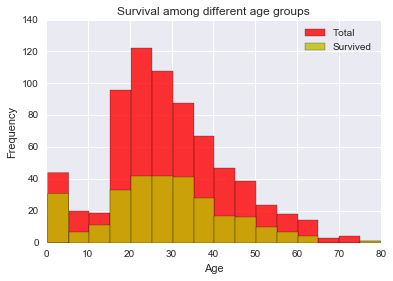

In [25]:
yz['Total'].plot.hist(bins= 16, color = (1, 0, 0), alpha = 0.8, legend = True)
xy[xy.Survived1 == 1]['Survived'].plot.hist(bins = 16, color = 'y', legend = True, alpha = 0.8)
plt.xlabel('Age'); plt.ylabel('Frequency')
plt.title('Survival among different age groups')

## Approximating missing ages

In [26]:
#calculate the number of missing ages
titanic.Age.isnull().sum()

177

In [27]:
# segregate ages of people with respect to honorifics (Mr., Mrs., Miss, etc.)
miss = []
mrs = []
mr = []
master = []
doc = []
for dic in titanic_list:
    if 'Miss' in dic['Name'] and dic['Sex'] == 'female' and str(dic['Age']) != 'nan':
        miss.append(dic['Age'])
    elif 'Mrs' in dic['Name'] and dic['Sex'] == 'female' and str(dic['Age']) != 'nan':
        mrs.append(dic['Age'])
    elif 'Dr.' in dic['Name'] and str(dic['Age']) != 'nan':
        doc.append(dic['Age'])
    elif 'Mr.' in dic['Name'] and dic['Sex'] == 'male' and str(dic['Age']) != 'nan':
        mr.append(dic['Age'])
    elif 'Master' in dic['Name'] and dic['Sex'] == 'male' and str(dic['Age']) != 'nan':
        master.append(dic['Age'])
print len(miss)
print len(mrs)
print len(mr)
print len(master)
print len(doc)

146
110
398
36
6


In [28]:
# calculate the median ages of people with different holorifics
print median(miss)
print median(mrs)
print median(mr)
print median(master)
print median(doc)

21.0
35.0
30.0
3.5
46.5


In [29]:
# approximate the missing ages of people based on their holorifics
for dic in titanic_list:
    if 'Miss' in dic['Name'] and dic['Sex'] == 'female' and str(dic['Age']) == 'nan':
        dic['Age'] = median(miss)
    elif 'Mrs' in dic['Name'] and dic['Sex'] == 'female' and str(dic['Age']) == 'nan':
        
        dic['Age'] = median(mrs)
    elif 'Mr.' in dic['Name'] and dic['Sex'] == 'male' and str(dic['Age']) == 'nan':
        dic['Age'] = median(mr)
    elif 'Master' in dic['Name'] and dic['Sex'] == 'male' and str(dic['Age']) == 'nan':
        dic['Age'] = median(master)
    elif 'Dr.' in dic['Name'] and dic['Sex'] == 'male' and str(dic['Age']) == 'nan':
        dic['Age'] = median(doc)

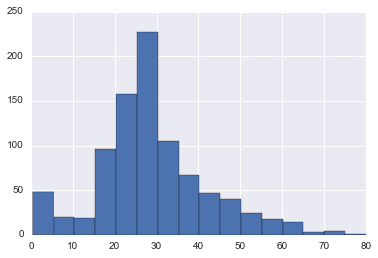

In [30]:
semi_comp = pd.DataFrame(titanic_list)
semi_comp['Age'].hist(bins = 16)

## Analysing 'Embarked' Data

In [31]:
# finding the number of people who embarked from S, Q and C.
print titanic['Embarked'].tolist().count('S')
print titanic['Embarked'].tolist().count('Q')
print titanic['Embarked'].tolist().count('C')

644
77
168


In [32]:
# grouping data on the basis of port of embarkation and adding new columns.
embark = titanic.groupby('Embarked').sum()
embark = embark[embark.columns.difference(['PassengerId', 'Age', 'Fare', 'Parch', 'Pclass', 'SibSp'])]
embark['Number of People'] = [168, 77, 644]
embark['Proportion Survived'] = [93/168., 30./77, 217./644]

In [33]:
embark = pd.DataFrame(embark.round(2))
embark = embark[['Number of People', 'Survived', 'Proportion Survived']]
embark

### From the above dataframe, we find that the survival rate of people is maximum for those whose embarkation port was C

In [34]:
s_fares = []
q_fares = []
c_fares = []
for dic in titanic_list:
    if dic['Embarked'] == 'C':
        c_fares.append(dic['Fare'])
    elif dic['Embarked'] == 'Q':
        q_fares.append(dic['Fare'])
    elif dic['Embarked'] == 'S':
        s_fares.append(dic['Fare'])

### Below we find that the mean fare for the embarkation port C is highest.

In [35]:
print mean(c_fares)
print mean(q_fares)
print mean(s_fares)

59.9541440476
13.2760298701
27.0798118012


In [36]:
embark['Mean Fare'] = [mean(c_fares), mean(q_fares), mean(s_fares)]
embark = pd.DataFrame(embark.round(2))
embark = embark[['Mean Fare', 'Number of People', 'Survived', 'Proportion Survived']]
embark

,Mean Fare,Number of People,Survived,Proportion Survived
Embarked,,,,
C,59.95,168,93,0.55
Q,13.28,77,30,0.39
S,27.08,644,217,0.34


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

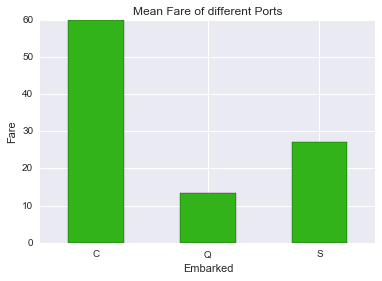

In [37]:
embark['Mean Fare'].plot.bar(title = 'Mean Fare of different Ports', color = (0.2, 0.7, 0.1))
plt.ylabel('Fare')
plt.xticks(rotation = 0)

### This suggests that richer people had more chances of survival 

## Approximating missing 'Embarked' values

In [38]:
titanic.Embarked.tolist().count(NaN)

2

In [39]:
# finding out the names for which the 'Embarked' value is missing.
for dic in titanic_list:
    if str(dic['Embarked']) == 'nan':
        print dic['Name']

Icard, Miss. Amelie
Stone, Mrs. George Nelson (Martha Evelyn)


In [40]:
s1 = []
s2 = []
s3 = []
c1 = []
c2 = []
c3 = []
q1 = []
q2 = []
q3 = []
for dic in titanic_list:
    if dic['Embarked'] == 'S':
        if dic['Pclass'] == 1:
            s1.append(dic['Fare'])
        elif dic['Pclass'] == 2:
            s2.append(dic['Fare'])
        else:
            s3.append(dic['Fare'])
    elif dic['Embarked'] == 'C':
        if dic['Pclass'] == 1:
            c1.append(dic['Fare'])
        elif dic['Pclass'] == 2:
            c2.append(dic['Fare'])
        else:
            c3.append(dic['Fare'])
    elif dic['Embarked'] == 'Q':
        if dic['Pclass'] == 1:
            q1.append(dic['Fare'])
        elif dic['Pclass'] == 2:
            q2.append(dic['Fare'])
        else:
            q3.append(dic['Fare'])

In [41]:
for dic in titanic_list:
    if str(dic['Embarked']) == 'nan':
        if dic['Pclass'] == 1:
            if abs(dic['Fare']-median(s1)) == min(abs(dic['Fare']-median(s1)), abs(dic['Fare']-median(c1)), abs(dic['Fare']-median(q1))):
                dic['Embarked'] = 'S'
            elif abs(dic['Fare']-median(c1)) == min(abs(dic['Fare']-median(s1)), abs(dic['Fare']-median(c1)), abs(dic['Fare']-median(q1))):
                dic['Embarked'] = 'C'
            elif abs(dic['Fare']-median(q1)) == min(abs(dic['Fare']-median(s1)), abs(dic['Fare']-median(c1)), abs(dic['Fare']-median(q1))):
                dic['Embarked'] = 'Q'
        elif dic['Pclass'] == 2:
            if abs(dic['Fare']-median(s2)) == min(abs(dic['Fare']-median(s2)), abs(dic['Fare']-median(c2)), abs(dic['Fare']-median(q2))):
                dic['Embarked'] = 'S'
            elif abs(dic['Fare']-median(c2)) == min(abs(dic['Fare']-median(s2)), abs(dic['Fare']-median(c2)), abs(dic['Fare']-median(q2))):
                dic['Embarked'] = 'C'
            elif abs(dic['Fare']-median(q2)) == min(abs(dic['Fare']-median(s2)), abs(dic['Fare']-median(c2)), abs(dic['Fare']-median(q2))):
                dic['Embarked'] = 'Q'
        else:
            if abs(dic['Fare']-median(s3)) == min(abs(dic['Fare']-median(s3)), abs(dic['Fare']-median(c3)), abs(dic['Fare']-median(q3))):
                dic['Embarekd'] = 'S'
            elif abs(dic['Fare']-median(c3)) == min(abs(dic['Fare']-median(s3)), abs(dic['Fare']-median(c3)), abs(dic['Fare']-median(q3))):
                dic['Embarekd'] = 'C'
            elif abs(dic['Fare']-median(q3)) == min(abs(dic['Fare']-median(s3)), abs(dic['Fare']-median(c3)), abs(dic['Fare']-median(q3))):
                dic['Embarekd'] = 'Q'

In [42]:
for dic in titanic_list:
    if str(dic['Embarked']) == 'nan':
        print dic['Name']

In [43]:
print median(s1)
print median(s2)
print median(s3)
print median(c1)
print median(c2)
print median(c3)
print median(q1)
print median(q2)
print median(q3)

52.0
13.5
8.05
78.2667
24.0
7.8958
90.0
12.35
7.75


In [44]:
titanic.groupby('Embarked').mean()['Fare']

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

In [45]:
pd.DataFrame(titanic_list).loc[829, 'Embarked']

'C'

In [46]:
# making new dataframe where the missing values have been approximated
complete_data = pd.DataFrame(titanic_list)
complete_data = complete_data[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', \
                              'Cabin', 'Embarked']]

In [47]:
complete_data.to_csv('complete_data.csv')